coucou Hugo


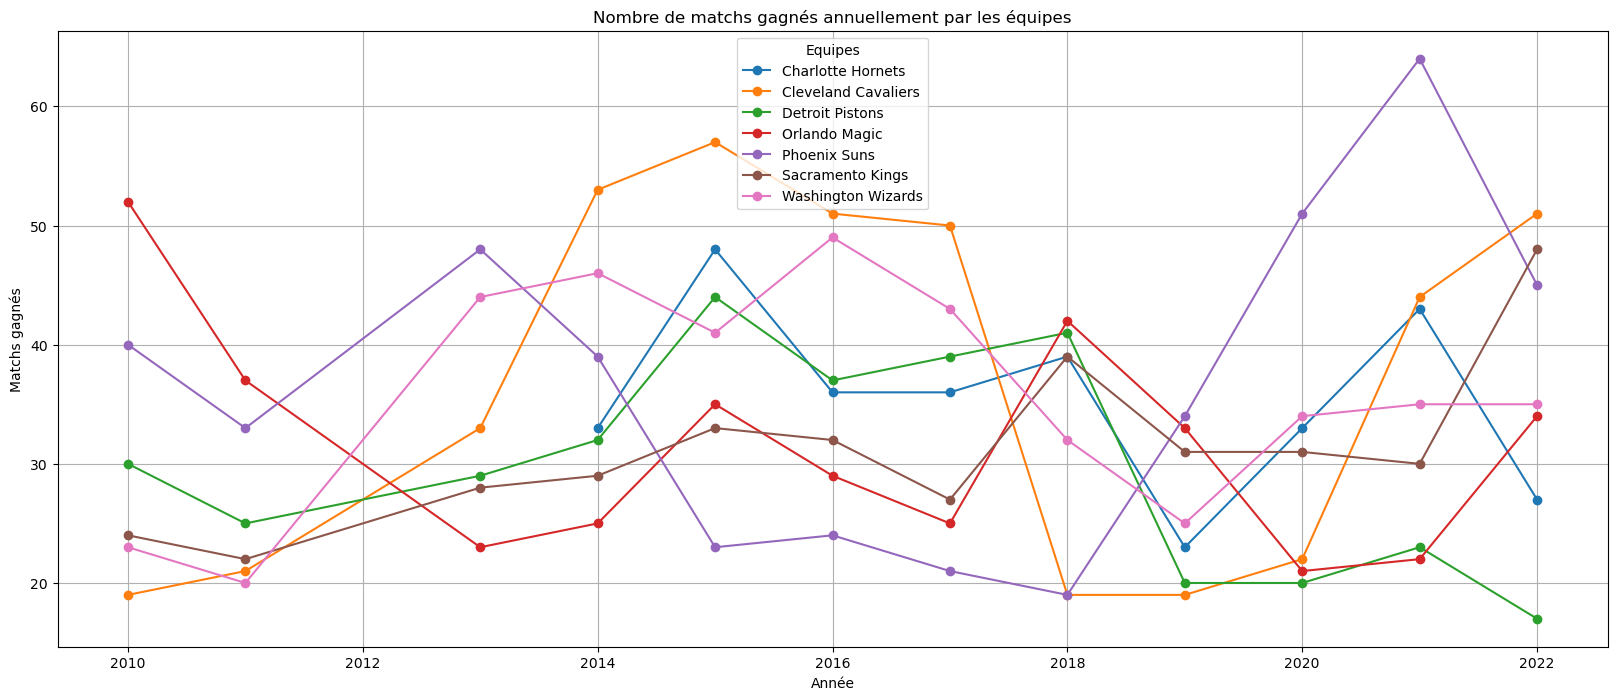

In [93]:
import matplotlib.pyplot as plt
import pandas as pd
df_game = pd.read_csv('game.csv')
# on garde que la "Regular Season"
df_game = df_game[df_game['season_type'].isin(['Regular Season'])]

print('coucou Hugo')

# on garde que les années supérieures à 2010
df_game= df_game[df_game['season_id'] >= 22010]

# on garde que les colonnes suivantes : 'season_id', 'team_name_home', 'wl_home', 'team_name_away', 'wl_away'
df_game = df_game.loc[:,['season_id', 'team_name_home', 'wl_home', 'team_name_away', 'wl_away']]
df_game

# conversion de season_id en année
def supprimer_premier_2(valeur):
    valeur_str = str(valeur)
    return int(valeur_str.replace('2', '', 1)) if '2' in valeur_str else valeur

df_game['season_id'] = df_game['season_id'].apply(supprimer_premier_2)
df_game['season_id'] = pd.to_datetime(df_game['season_id'], format='%Y').dt.year
df_game

# total des matchs 'away' gagnés par saison
df_new_game_away = df_game.groupby(['team_name_away', 'season_id'])['wl_away'].value_counts().reset_index(name='total_away')
df_new_game_away = df_new_game_away.sort_values(by=['team_name_away', 'season_id', 'wl_away'])

# on conserve que les matchs gagnés
df_new_game_away = df_new_game_away.loc[df_new_game_away['wl_away'] == 'W'].reset_index()
df_new_game_away

# total des matchs 'home' gagnés par saison
df_new_game_home = df_game.groupby(['team_name_home', 'season_id'])['wl_home'].value_counts().reset_index(name='total_home')
df_new_game_home = df_new_game_home.sort_values(by=['team_name_home', 'season_id', 'wl_home'])

# on conserve que les matchs gagnés
df_new_game_home = df_new_game_home.loc[df_new_game_home['wl_home'] == 'W'].reset_index()
df_new_game_home

# on rassemble le total_away
df_new_game_home.insert(loc=len(df_new_game_home.columns), column='total_away', value=df_new_game_away['total_away'])
df_new_game_home

# somme des home + away
colomns_list = ['total_home', 'total_away']
df_new_game_home['somme'] = df_new_game_home[colomns_list].sum(axis=1)
df_new_game_home

# suppression des colonnes inutiles
df_new_game = df_new_game_home.loc[:,['team_name_home', 'season_id', 'somme']]
df_new_game
df_draft_history = pd.read_csv('draft_history.csv')
df_draft_history = df_draft_history[df_draft_history["overall_pick"] <= 14]
list_team = df_draft_history['team_city'] + ' ' + df_draft_history['team_name']
list_team = list_team.value_counts().index
list_team
list = ['Washington Wizards', 'Detroit Pistons', 'Cleveland Cavaliers', 'Phoenix Suns', 'Sacramento Kings', 'Charlotte Hornets', 'Orlando Magic']
df_selectionne = df_new_game[df_new_game['team_name_home'].isin(list)]

# Tracer un graphique en ligne pour chaque nom
plt.figure(figsize=(20, 8))

# Utiliser groupby pour tracer des lignes pour chaque nom
for nom, group in df_selectionne.groupby('team_name_home'):
    plt.plot(group['season_id'], group['somme'], marker='o', linestyle='-', label=nom)

# Ajouter des titres et des labels
plt.title('Nombre de matchs gagnés annuellement par les équipes')
plt.xlabel('Année')
plt.ylabel('Matchs gagnés')
plt.legend(title='Equipes')
plt.grid(True)

# Afficher le graphique
plt.show()

In [94]:
#LE DF QU'ON DOIT UTILISER POUR AVOIR LA SOMME DES MATCHS GAGNÉ = LA PERFORMANCE DES EQUIPES
df_new_game_home['somme']


0      44
1      40
2      38
3      60
4      48
       ..
355    32
356    25
357    34
358    35
359    35
Name: somme, Length: 360, dtype: int64

In [95]:
df_new_game_home

,index,team_name_home,season_id,wl_home,total_home,total_away,somme
0,0,Atlanta Hawks,2010,W,24,20,44
1,2,Atlanta Hawks,2011,W,23,17,40
2,4,Atlanta Hawks,2013,W,24,14,38
3,6,Atlanta Hawks,2014,W,35,25,60
4,8,Atlanta Hawks,2015,W,27,21,48
...,...,...,...,...,...,...,...
355,710,Washington Wizards,2018,W,22,10,32
356,713,Washington Wizards,2019,W,16,9,25
357,714,Washington Wizards,2020,W,19,15,34
358,716,Washington Wizards,2021,W,21,14,35


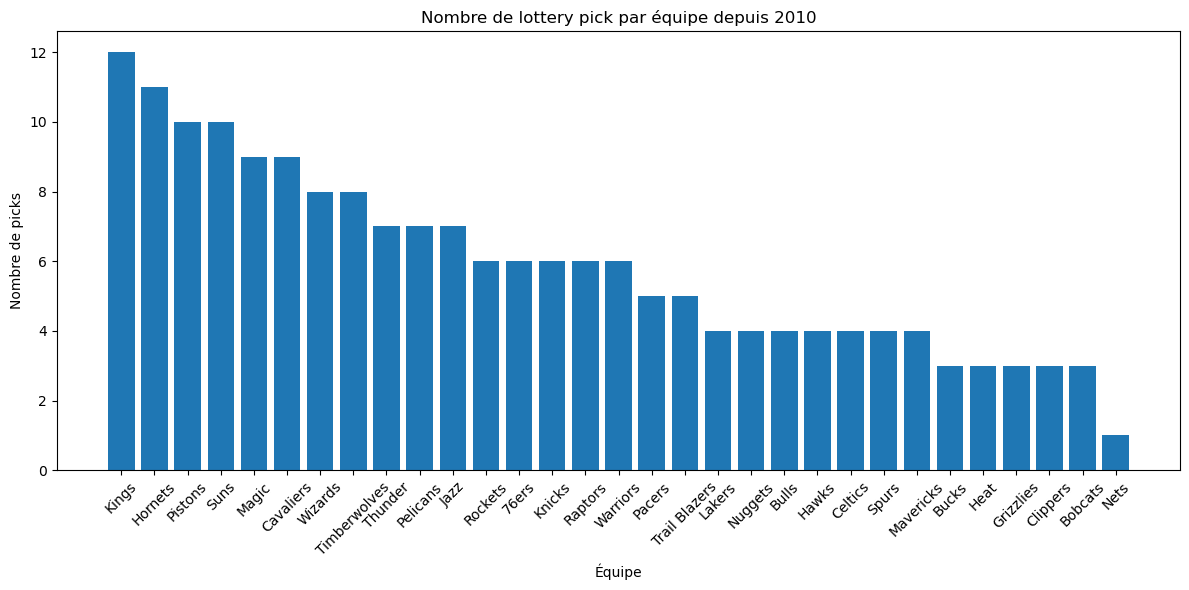

      overall_pick     team_name  season
7695             2     Grizzlies    2019
7404            11         76ers    2013
7524            11       Thunder    2016
7514             1         76ers    2016
7226            13       Raptors    2010
7402             9  Timberwolves    2013
7644            11       Hornets    2018
7647            14       Nuggets    2018
7587            14          Heat    2017
7823            10      Pelicans    2021


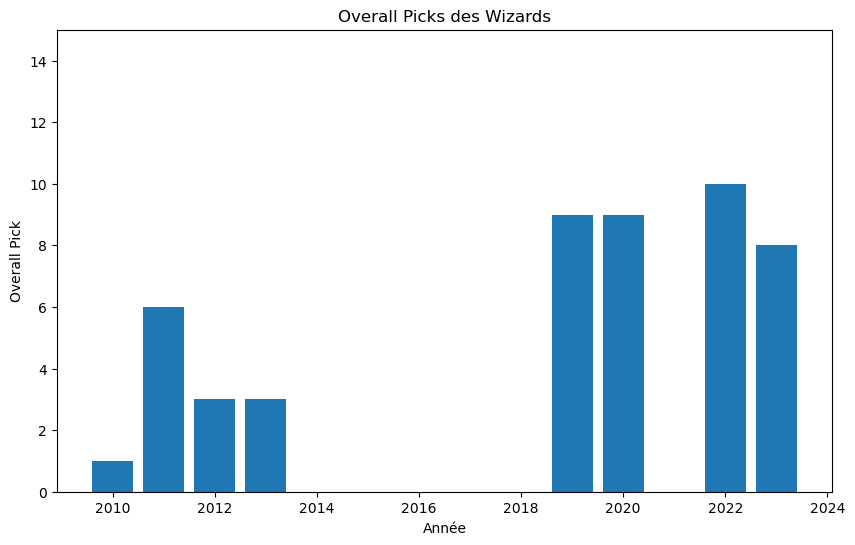

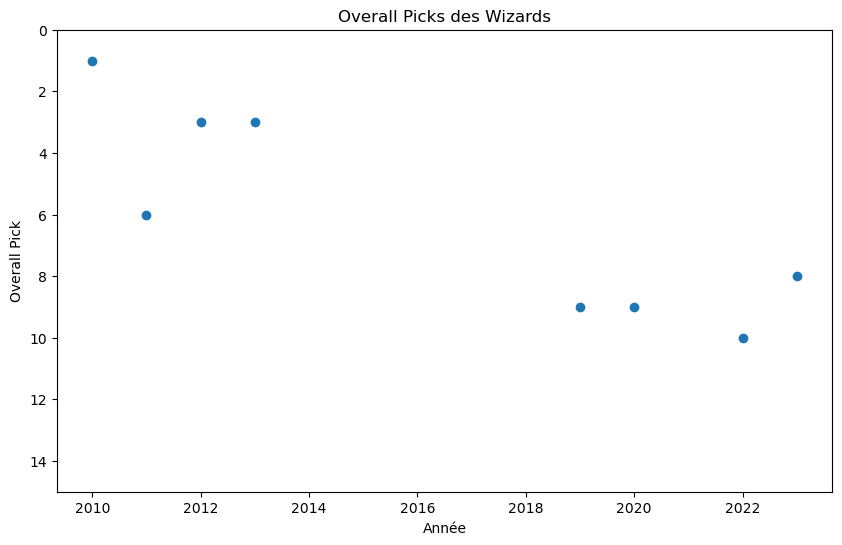

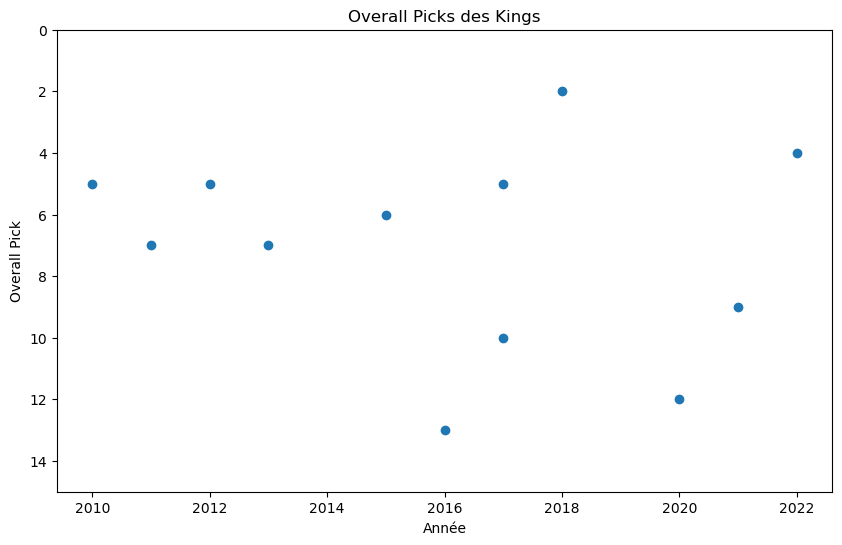

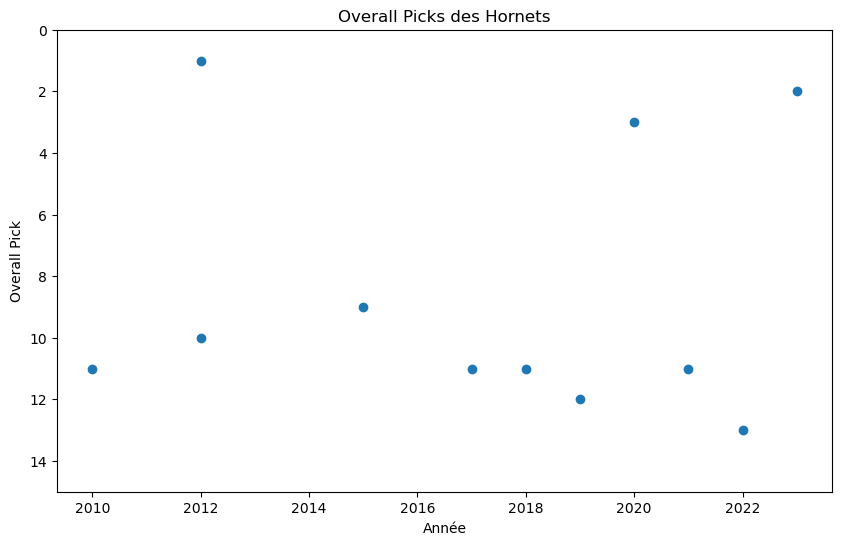

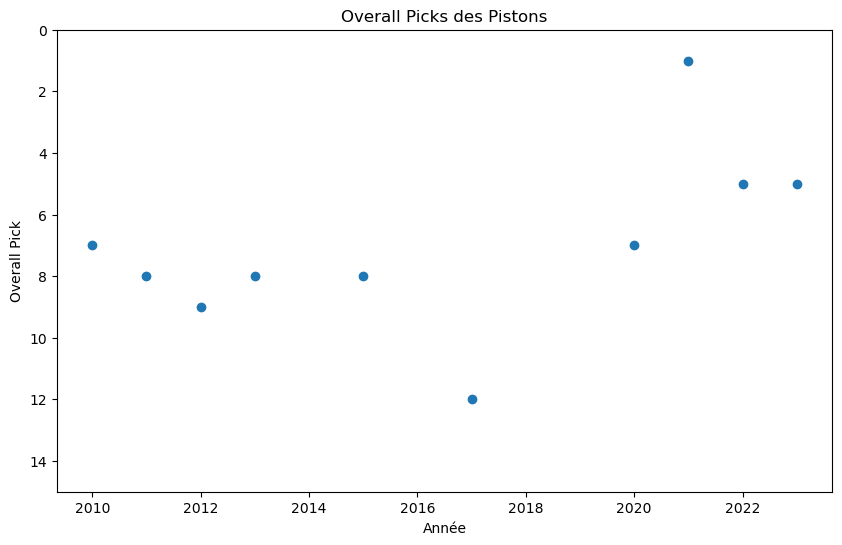

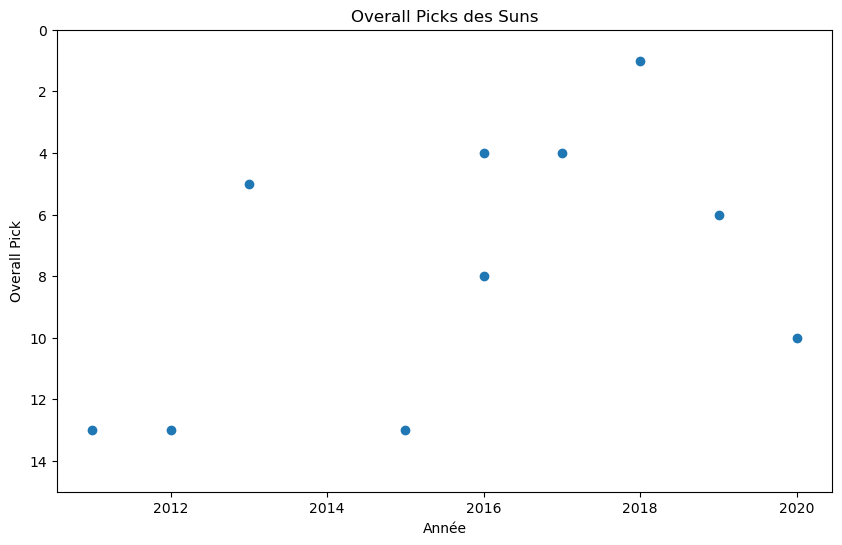

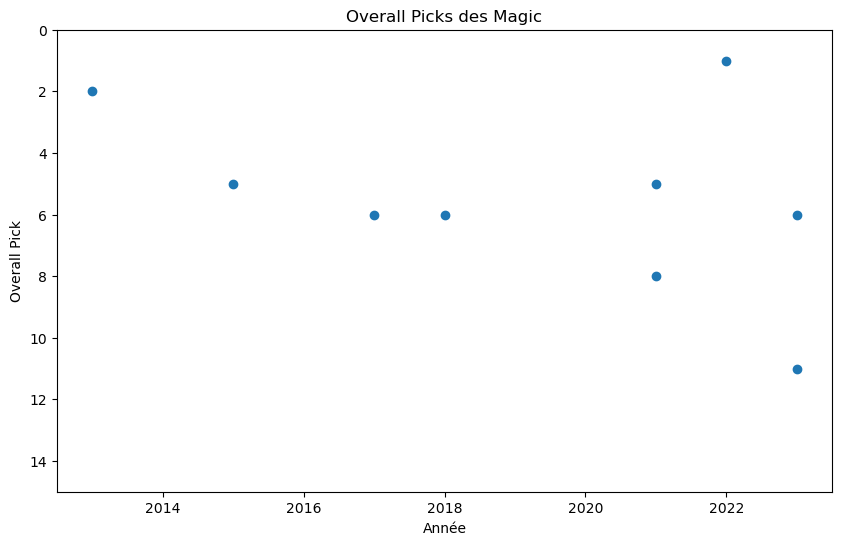

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)

df_common_player=pd.read_csv("common_player_info.csv")
df_draft_history=pd.read_csv("draft_history.csv")
df_game=pd.read_csv("game.csv")
df_other_stats=pd.read_csv("other_stats.csv")
df_draft_history.head()

df_draft_history.columns
df_draft_history["season"].unique()
# On s'intéresse à la période post 2010
df_draft_history= df_draft_history[df_draft_history['season'] >= 2010]
# On garde seulement les lottery picks
df_draft_history=df_draft_history[df_draft_history['overall_pick'] <= 14]
df_draft_history["season"].unique()
df_draft_history.head()
overall_pick = df_draft_history['overall_pick']
team_name = df_draft_history['team_name']
team_counts = team_name.value_counts()

# Créer un graphique à barres
plt.figure(figsize=(12, 6))
plt.bar(team_counts.index, team_counts.values)
plt.xlabel('Équipe')
plt.ylabel('Nombre de picks')
plt.title('Nombre de lottery pick par équipe depuis 2010')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df_draft_history.head()


#HUGO démarre là

# On s'intéresse à la période post 2010
df_draft_history= df_draft_history[df_draft_history['season'] >= 2010]
#On veut l'overall pick dans les 5 premières équipes de la lotterie = top 5
#On va créer un df "top5_team_overall_pick"

top5_team_overall_pick = df_draft_history[['overall_pick', 'team_name', 'season']]
top5_team_overall_pick.head()
top5_team_overall_pick_sample = top5_team_overall_pick.sample(n=10)
print(top5_team_overall_pick_sample)

import matplotlib.pyplot as plt

# Filtrer les données pour ne garder que les Wizards
wizards_picks = top5_team_overall_pick[top5_team_overall_pick['team_name'] == 'Wizards']

# Créer les listes pour les années et les overall_pick
years = wizards_picks['season'].tolist()
picks = wizards_picks['overall_pick'].tolist()

# Créer le graphique
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(years, picks, bottom=0)

# Ajuster les limites des ordonnées de 0 à 14
ax.set_ylim(0, 15)

# Ajouter les labels et le titre
ax.set_xlabel('Année')
ax.set_ylabel('Overall Pick')
ax.set_title('Overall Picks des Wizards')

# Afficher le graphique
plt.show()

#WIZARDS

import matplotlib.pyplot as plt

# Filtrer les données pour ne garder que les Wizards
wizards_picks = top5_team_overall_pick[top5_team_overall_pick['team_name'] == 'Wizards']

# Créer les listes pour les années et les overall_pick
years = wizards_picks['season'].tolist()
picks = wizards_picks['overall_pick'].tolist()

# Créer le graphique
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(years, picks)

# Ajuster les limites des ordonnées de 0 à 14
ax.set_ylim(15, 0)

# Ajouter les labels et le titre
ax.set_xlabel('Année')
ax.set_ylabel('Overall Pick')
ax.set_title('Overall Picks des Wizards')

# Afficher le graphique
plt.show()

#Moyenne des pick sur 14 ans avec arrondi à un entier
team_avg_pick = top5_team_overall_pick.groupby('team_name')['overall_pick'].mean().reset_index().round()
team_avg_pick.head()
#Kings

import matplotlib.pyplot as plt

# Filtrer les données pour ne garder que les Kings
Kings_picks = top5_team_overall_pick[top5_team_overall_pick['team_name'] == 'Kings']

# Créer les listes pour les années et les overall_pick
years = Kings_picks['season'].tolist()
picks = Kings_picks['overall_pick'].tolist()

# Créer le graphique
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(years, picks)

# Ajuster les limites des ordonnées de 0 à 14
ax.set_ylim(15, 0)

# Ajouter les labels et le titre
ax.set_xlabel('Année')
ax.set_ylabel('Overall Pick')
ax.set_title('Overall Picks des Kings')

# Afficher le graphique
plt.show()

#Hornets

import matplotlib.pyplot as plt

# Filtrer les données pour ne garder que les Hornets
Hornets_picks = top5_team_overall_pick[top5_team_overall_pick['team_name'] == 'Hornets']

# Créer les listes pour les années et les overall_pick
years = Hornets_picks['season'].tolist()
picks = Hornets_picks['overall_pick'].tolist()

# Créer le graphique
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(years, picks)

# Ajuster les limites des ordonnées de 0 à 14
ax.set_ylim(15, 0)

# Ajouter les labels et le titre
ax.set_xlabel('Année')
ax.set_ylabel('Overall Pick')
ax.set_title('Overall Picks des Hornets')

# Afficher le graphique
plt.show()
#Pistons

import matplotlib.pyplot as plt

# Filtrer les données pour ne garder que les Pistons
Pistons_picks = top5_team_overall_pick[top5_team_overall_pick['team_name'] == 'Pistons']

# Créer les listes pour les années et les overall_pick
years = Pistons_picks['season'].tolist()
picks = Pistons_picks['overall_pick'].tolist()

# Créer le graphique
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(years, picks)

# Ajuster les limites des ordonnées de 0 à 14
ax.set_ylim(15, 0)

# Ajouter les labels et le titre
ax.set_xlabel('Année')
ax.set_ylabel('Overall Pick')
ax.set_title('Overall Picks des Pistons')

# Afficher le graphique
plt.show()
#Suns

import matplotlib.pyplot as plt

# Filtrer les données pour ne garder que les Suns
Suns_picks = top5_team_overall_pick[top5_team_overall_pick['team_name'] == 'Suns']

# Créer les listes pour les années et les overall_pick
years = Suns_picks['season'].tolist()
picks = Suns_picks['overall_pick'].tolist()

# Créer le graphique
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(years, picks)

# Ajuster les limites des ordonnées de 0 à 14
ax.set_ylim(15, 0)

# Ajouter les labels et le titre
ax.set_xlabel('Année')
ax.set_ylabel('Overall Pick')
ax.set_title('Overall Picks des Suns')

# Afficher le graphique
plt.show()
#Magic

import matplotlib.pyplot as plt

# Filtrer les données pour ne garder que les Magic
Magic_picks = top5_team_overall_pick[top5_team_overall_pick['team_name'] == 'Magic']

# Créer les listes pour les années et les overall_pick
years = Magic_picks['season'].tolist()
picks = Magic_picks['overall_pick'].tolist()

# Créer le graphique
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(years, picks)

# Ajuster les limites des ordonnées de 0 à 14
ax.set_ylim(15, 0)

# Ajouter les labels et le titre
ax.set_xlabel('Année')
ax.set_ylabel('Overall Pick')
ax.set_title('Overall Picks des Magic')

# Afficher le graphique
plt.show()

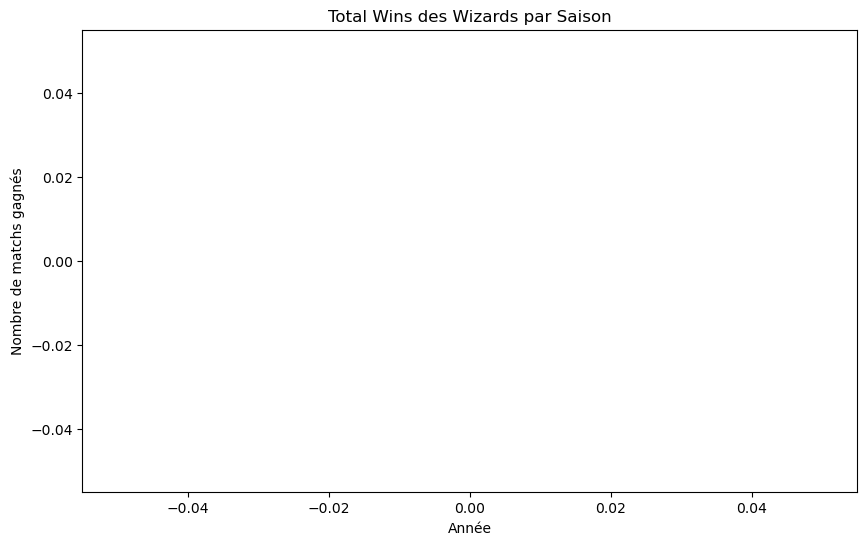

In [97]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already loaded the data and have the df_new_game_home DataFrame
# Filter data for the Wizards
wizards_data = df_new_game_home[df_new_game_home['team_name_home'] == 'Wizards']

# Extract total wins and years
wizards_wins = wizards_data['somme'].tolist()
wizards_years = wizards_data['season_id'].tolist()

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(wizards_years, wizards_wins, marker='o', linestyle='-', label='Total Wins')

# Add labels and title
plt.xlabel('Année')
plt.ylabel('Nombre de matchs gagnés')
plt.title('Total Wins des Wizards par Saison')

# Show the graph
plt.show()


In [98]:
top5_team_overall_pick.head()
df_new_game_home.head()

,index,team_name_home,season_id,wl_home,total_home,total_away,somme
0,0,Atlanta Hawks,2010,W,24,20,44
1,2,Atlanta Hawks,2011,W,23,17,40
2,4,Atlanta Hawks,2013,W,24,14,38
3,6,Atlanta Hawks,2014,W,35,25,60
4,8,Atlanta Hawks,2015,W,27,21,48


In [99]:
r = top5_team_overall_pick.sample(5)
print(r)

      overall_pick team_name  season
7942            11     Magic    2023
7276             3      Jazz    2011
7640             7     Bulls    2018
7342             9   Pistons    2012
7578             5     Kings    2017


In [100]:
#Modification de df_new_game_home pour garder que le dernier mot des équipes

# Fonction lambda pour extraire le dernier mot
def dernier_mot(nom_equipe):
  return nom_equipe.split()[-1]

# Appliquer la fonction lambda à la colonne 'team_name_home'
df_new_game_home['team_name_home'] = df_new_game_home['team_name_home'].apply(dernier_mot)

r = df_new_game_home.sample(5)
print(r)

     index team_name_home  season_id wl_home  total_home  total_away  somme
278    556           Suns       2013       W          26          22     48
45      91        Hornets       2022       W          13          14     27
209    418   Timberwolves       2018       W          25          11     36
109    218       Warriors       2014       W          39          28     67
18      36        Celtics       2017       W          27          28     55


In [101]:
# Renommer les colonnes pour faciliter la jointure
top5_team_overall_pick = top5_team_overall_pick.rename(columns={'team_name': 'team_name_home', 'season': 'season_id'})

# Effectuer la jointure avec la méthode merge()
df_merged_top5pick_newgamehome = pd.merge(df_new_game_home, top5_team_overall_pick, how='inner', on=['team_name_home', 'season_id'])
df_merged_top5pick_newgamehome.head()

,index,team_name_home,season_id,wl_home,total_home,total_away,somme,overall_pick
0,15,Hawks,2018,W,17,12,29,3
1,17,Hawks,2019,W,14,6,20,8
2,17,Hawks,2019,W,14,6,20,10
3,18,Hawks,2020,W,25,16,41,6
4,34,Celtics,2016,W,30,23,53,3


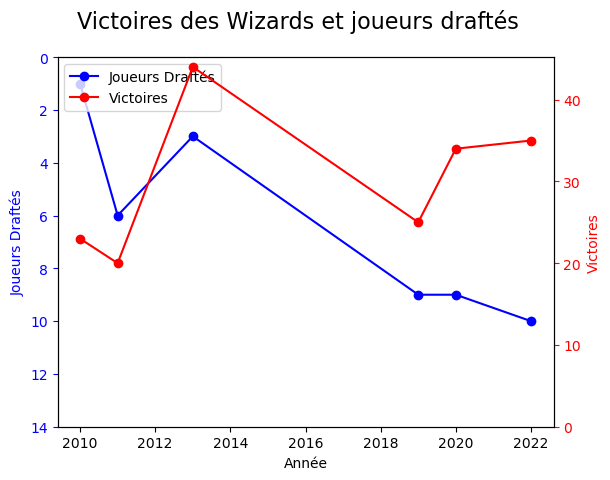

In [102]:
import matplotlib.pyplot as plt

# Filtrer les données pour l'équipe "Wizards"
wizards_data = df_merged_top5pick_newgamehome[df_merged_top5pick_newgamehome['team_name_home'] == 'Wizards']

# Créer la figure et l'axe principal
fig, ax1 = plt.subplots()

# Ajouter un titre
fig.suptitle("Victoires des Wizards et joueurs draftés", fontsize=16)

# Tracer l'overall_pick en fonction de season_id
ax1.plot(wizards_data['season_id'], wizards_data['overall_pick'], color='b', marker='o', label='Joueurs Draftés')
ax1.set_xlabel('Année')
ax1.set_ylabel('Joueurs Draftés', color='b')
ax1.tick_params('y', colors='b')
ax1.set_ylim(14, 0) # Inverser l'échelle de l'axe des ordonnées

# Créer un axe secondaire pour la somme
ax2 = ax1.twinx()
ax2.plot(wizards_data['season_id'], wizards_data['somme'], color='r', marker='o', label='Victoires')
ax2.set_ylabel('Victoires', color='r')
ax2.tick_params('y', colors='r')

# Ajuster les limites des axes
ax2.set_ylim(bottom=0)

# Ajouter une légende
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Afficher le graphique
plt.show()


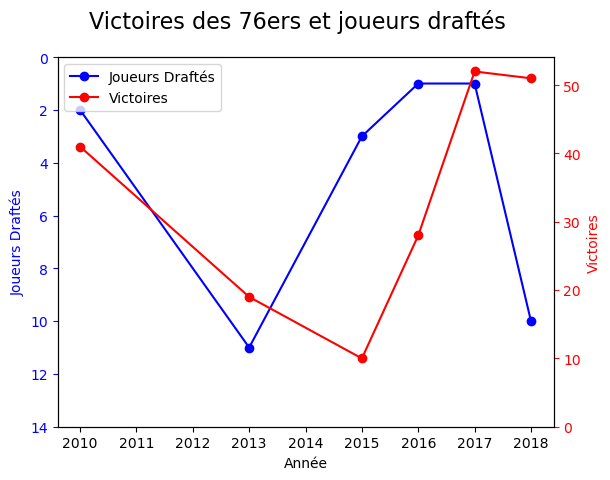

In [103]:
import matplotlib.pyplot as plt

# Filtrer les données pour l'équipe "76ers"
_76ers_data = df_merged_top5pick_newgamehome[df_merged_top5pick_newgamehome['team_name_home'] == '76ers']

# Créer la figure et l'axe principal
fig, ax1 = plt.subplots()

# Ajouter un titre
fig.suptitle("Victoires des 76ers et joueurs draftés", fontsize=16)

# Tracer l'overall_pick en fonction de season_id
ax1.plot(_76ers_data['season_id'], _76ers_data['overall_pick'], color='b', marker='o', label='Joueurs Draftés')
ax1.set_xlabel('Année')
ax1.set_ylabel('Joueurs Draftés', color='b')
ax1.tick_params('y', colors='b')
ax1.set_ylim(14, 0) # Inverser l'échelle de l'axe des ordonnées

# Créer un axe secondaire pour la somme
ax2 = ax1.twinx()
ax2.plot(_76ers_data['season_id'], _76ers_data['somme'], color='r', marker='o', label='Victoires')
ax2.set_ylabel('Victoires', color='r')
ax2.tick_params('y', colors='r')

# Ajuster les limites des axes
ax2.set_ylim(bottom=0)

# Ajouter une légende
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Afficher le graphique
plt.show()


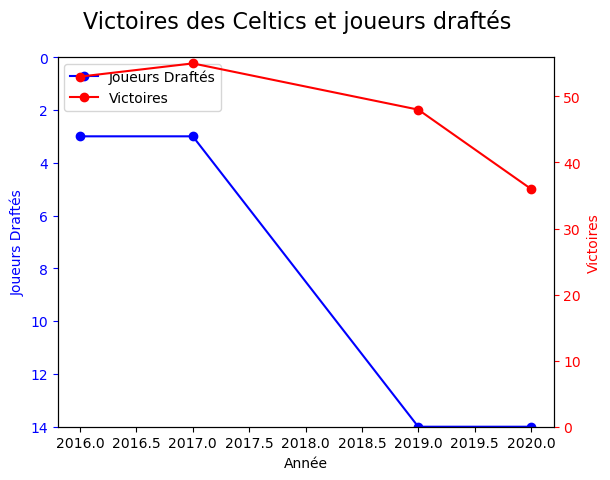

In [108]:
# Filtrer les données pour l'équipe "Celtics"
Celtics_data = df_merged_top5pick_newgamehome[df_merged_top5pick_newgamehome['team_name_home'] == 'Celtics']

# Créer la figure et l'axe principal
fig, ax1 = plt.subplots()

# Ajouter un titre
fig.suptitle("Victoires des Celtics et joueurs draftés", fontsize=16)

# Tracer l'overall_pick en fonction de season_id
ax1.plot(Celtics_data['season_id'], Celtics_data['overall_pick'], color='b', marker='o', label='Joueurs Draftés')
ax1.set_xlabel('Année')
ax1.set_ylabel('Joueurs Draftés', color='b')
ax1.tick_params('y', colors='b')
ax1.set_ylim(14, 0) # Inverser l'échelle de l'axe des ordonnées

# Créer un axe secondaire pour la somme
ax2 = ax1.twinx()
ax2.plot(Celtics_data['season_id'], Celtics_data['somme'], color='r', marker='o', label='Victoires')
ax2.set_ylabel('Victoires', color='r')
ax2.tick_params('y', colors='r')

# Ajuster les limites des axes
ax2.set_ylim(bottom=0)

# Ajouter une légende
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Afficher le graphique
plt.show()


In [109]:
Celtics_data

,index,team_name_home,season_id,wl_home,total_home,total_away,somme,overall_pick
4,34,Celtics,2016,W,30,23,53,3
5,36,Celtics,2017,W,27,28,55,3
6,40,Celtics,2019,W,26,22,48,14
7,42,Celtics,2020,W,21,15,36,14


In [105]:
merged2_df = pd.merge(df_draft_history, df_common_player, on='person_id', how='outer')
merged2_df.head()

,person_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id_x,team_city_x,team_name_x,team_abbreviation_x,organization,organization_type,player_profile_flag,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,last_affiliation,height,weight,season_exp,jersey,position,rosterstatus,games_played_current_season_flag,team_id_y,team_name_y,team_abbreviation_y,team_code,team_city_y,playercode,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag
0,202322,John Wall,2010.0,1.0,1.0,1.0,Draft,1.610613e+09,Washington,Wizards,WAS,Kentucky,College/University,1.0,John,Wall,John Wall,"Wall, John",J. Wall,john-wall,1990-09-06 00:00:00,Kentucky,USA,Kentucky/USA,6-3,210.0,11.0,NaN,Guard,Inactive,N,0.000000e+00,NaN,NaN,NaN,NaN,john_wall,2010.0,2022.0,N,Y,Y,2010,1,1,N
1,202323,Evan Turner,2010.0,1.0,2.0,2.0,Draft,1.610613e+09,Philadelphia,76ers,PHI,Ohio State,College/University,1.0,Evan,Turner,Evan Turner,"Turner, Evan",E. Turner,evan-turner,1988-10-27 00:00:00,Ohio State,USA,Ohio State/USA,6-6,220.0,11.0,1,Guard-Forward,Inactive,N,1.610613e+09,76ers,PHI,sixers,Philadelphia,evan_turner,2010.0,2019.0,N,Y,Y,2010,1,2,N
2,202324,Derrick Favors,2010.0,1.0,3.0,3.0,Draft,1.610613e+09,New Jersey,Nets,NJN,Georgia Tech,College/University,1.0,Derrick,Favors,Derrick Favors,"Favors, Derrick",D. Favors,derrick-favors,1991-07-15 00:00:00,Georgia Tech,USA,Georgia Tech/USA,6-9,265.0,13.0,15,Forward,Inactive,N,1.610613e+09,Thunder,OKC,thunder,Oklahoma City,derrick_favors,2010.0,2021.0,N,Y,Y,2010,1,3,N
3,202325,Wesley Johnson,2010.0,1.0,4.0,4.0,Draft,1.610613e+09,Minnesota,Timberwolves,MIN,Syracuse,College/University,1.0,Wesley,Johnson,Wesley Johnson,"Johnson, Wesley",W. Johnson,wesley-johnson,1987-07-11 00:00:00,Syracuse,USA,Syracuse/USA,6-7,215.0,10.0,4,Forward-Guard,Inactive,N,1.610613e+09,Clippers,LAC,clippers,LA,wesley_johnson,2010.0,2018.0,N,Y,Y,2010,1,4,N
4,202326,DeMarcus Cousins,2010.0,1.0,5.0,5.0,Draft,1.610613e+09,Sacramento,Kings,SAC,Kentucky,College/University,1.0,DeMarcus,Cousins,DeMarcus Cousins,"Cousins, DeMarcus",D. Cousins,demarcus-cousins,1990-08-13 00:00:00,Kentucky,USA,Kentucky/USA,6-10,270.0,12.0,4,Center,Inactive,N,1.610613e+09,Nuggets,DEN,nuggets,Denver,demarcus_cousins,2010.0,2021.0,N,Y,Y,2010,1,5,N


In [106]:
boston_rows = merged2_df.loc[(merged2_df['team_city_x'].str.contains('Boston')) | 
                             (merged2_df['team_city_y'].str.contains('Boston'))]

boston_rows.head()


,person_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id_x,team_city_x,team_name_x,team_abbreviation_x,organization,organization_type,player_profile_flag,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,last_affiliation,height,weight,season_exp,jersey,position,rosterstatus,games_played_current_season_flag,team_id_y,team_name_y,team_abbreviation_y,team_code,team_city_y,playercode,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag
59,204001,Kristaps Porzingis,2015.0,1.0,4.0,4.0,Draft,1.610613e+09,New York,Knicks,NYK,CB Sevilla (Spain),Other Team/Club,1.0,Kristaps,Porzingis,Kristaps Porzingis,"Porzingis, Kristaps",K. Porzingis,kristaps-porzingis,1995-08-02 00:00:00,Cajasol Sevilla,Latvia,Cajasol Sevilla/Latvia,7-3,240.0,7.0,6,Forward-Center,Active,N,1.610613e+09,Celtics,BOS,celtics,Boston,kristaps_porzingis,2015.0,2023.0,N,Y,Y,2015,1,4,N
72,1627759,Jaylen Brown,2016.0,1.0,3.0,3.0,Draft,1.610613e+09,Boston,Celtics,BOS,California,College/University,1.0,Jaylen,Brown,Jaylen Brown,"Brown, Jaylen",J. Brown,jaylen-brown,1996-10-24 00:00:00,California,USA,California/USA,6-6,223.0,7.0,7,Guard-Forward,Active,N,1.610613e+09,Celtics,BOS,celtics,Boston,jaylen_brown,2016.0,2023.0,N,Y,Y,2016,1,3,N
86,1628369,Jayson Tatum,2017.0,1.0,3.0,3.0,Draft,1.610613e+09,Boston,Celtics,BOS,Duke,College/University,1.0,Jayson,Tatum,Jayson Tatum,"Tatum, Jayson",J. Tatum,jayson-tatum,1998-03-03 00:00:00,Duke,USA,Duke/USA,6-8,210.0,6.0,0,Forward-Guard,Active,N,1.610613e+09,Celtics,BOS,celtics,Boston,jayson_tatum,2017.0,2023.0,N,Y,Y,2017,1,3,N
125,1629641,Romeo Langford,2019.0,1.0,14.0,14.0,Draft,1.610613e+09,Boston,Celtics,BOS,Indiana,College/University,1.0,Romeo,Langford,Romeo Langford,"Langford, Romeo",R. Langford,romeo-langford,1999-10-25 00:00:00,Indiana,USA,Indiana/USA,6-5,216.0,4.0,35,Guard-Forward,Active,N,1.610613e+09,Spurs,SAS,spurs,San Antonio,romeo_langford,2019.0,2023.0,Y,Y,Y,2019,1,14,N
139,1630174,Aaron Nesmith,2020.0,1.0,14.0,14.0,Draft,1.610613e+09,Boston,Celtics,BOS,Vanderbilt,College/University,1.0,Aaron,Nesmith,Aaron Nesmith,"Nesmith, Aaron",A. Nesmith,aaron-nesmith,1999-10-16 00:00:00,Vanderbilt,USA,Vanderbilt/USA,6-5,215.0,3.0,23,Guard-Forward,Active,N,1.610613e+09,Pacers,IND,pacers,Indiana,aaron_nesmith,2020.0,2023.0,Y,Y,Y,2020,1,14,N


In [107]:
boston_rows_after_2013 = merged2_df.loc[(merged2_df['team_city_x'].str.contains('Boston')) |
                                        (merged2_df['team_city_y'].str.contains('Boston')) &
                                        (merged2_df['season'] > 2013)]
boston_rows.head()

,person_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id_x,team_city_x,team_name_x,team_abbreviation_x,organization,organization_type,player_profile_flag,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,last_affiliation,height,weight,season_exp,jersey,position,rosterstatus,games_played_current_season_flag,team_id_y,team_name_y,team_abbreviation_y,team_code,team_city_y,playercode,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag
59,204001,Kristaps Porzingis,2015.0,1.0,4.0,4.0,Draft,1.610613e+09,New York,Knicks,NYK,CB Sevilla (Spain),Other Team/Club,1.0,Kristaps,Porzingis,Kristaps Porzingis,"Porzingis, Kristaps",K. Porzingis,kristaps-porzingis,1995-08-02 00:00:00,Cajasol Sevilla,Latvia,Cajasol Sevilla/Latvia,7-3,240.0,7.0,6,Forward-Center,Active,N,1.610613e+09,Celtics,BOS,celtics,Boston,kristaps_porzingis,2015.0,2023.0,N,Y,Y,2015,1,4,N
72,1627759,Jaylen Brown,2016.0,1.0,3.0,3.0,Draft,1.610613e+09,Boston,Celtics,BOS,California,College/University,1.0,Jaylen,Brown,Jaylen Brown,"Brown, Jaylen",J. Brown,jaylen-brown,1996-10-24 00:00:00,California,USA,California/USA,6-6,223.0,7.0,7,Guard-Forward,Active,N,1.610613e+09,Celtics,BOS,celtics,Boston,jaylen_brown,2016.0,2023.0,N,Y,Y,2016,1,3,N
86,1628369,Jayson Tatum,2017.0,1.0,3.0,3.0,Draft,1.610613e+09,Boston,Celtics,BOS,Duke,College/University,1.0,Jayson,Tatum,Jayson Tatum,"Tatum, Jayson",J. Tatum,jayson-tatum,1998-03-03 00:00:00,Duke,USA,Duke/USA,6-8,210.0,6.0,0,Forward-Guard,Active,N,1.610613e+09,Celtics,BOS,celtics,Boston,jayson_tatum,2017.0,2023.0,N,Y,Y,2017,1,3,N
125,1629641,Romeo Langford,2019.0,1.0,14.0,14.0,Draft,1.610613e+09,Boston,Celtics,BOS,Indiana,College/University,1.0,Romeo,Langford,Romeo Langford,"Langford, Romeo",R. Langford,romeo-langford,1999-10-25 00:00:00,Indiana,USA,Indiana/USA,6-5,216.0,4.0,35,Guard-Forward,Active,N,1.610613e+09,Spurs,SAS,spurs,San Antonio,romeo_langford,2019.0,2023.0,Y,Y,Y,2019,1,14,N
139,1630174,Aaron Nesmith,2020.0,1.0,14.0,14.0,Draft,1.610613e+09,Boston,Celtics,BOS,Vanderbilt,College/University,1.0,Aaron,Nesmith,Aaron Nesmith,"Nesmith, Aaron",A. Nesmith,aaron-nesmith,1999-10-16 00:00:00,Vanderbilt,USA,Vanderbilt/USA,6-5,215.0,3.0,23,Guard-Forward,Active,N,1.610613e+09,Pacers,IND,pacers,Indiana,aaron_nesmith,2020.0,2023.0,Y,Y,Y,2020,1,14,N
